<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hossam-elshabory/Popular-Video-Games-1980-2023_EDA/blob/main/popular-video-games-1980-2023-eda.ipynb) -OR-
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/code/hossamelshabory97/popular-video-games-1980-2023-eda/notebook)

</div>

<h1 align="center">Popular Video Games EDA</h1>

<div style="text-align:center;">
    <img src="https://i.imgur.com/sDrZ07n.jpg" width=800 alt="project-banner">
</div>

# Introduction 

Video games have become an increasingly popular form of entertainment in recent years, with the industry experiencing tremendous growth and success. Since the release of the first commercial video game, "Computer Space," in 1971, the industry has continued to evolve and expand, with new technologies and platforms constantly being introduced.

Today, video games are played by people of all ages and backgrounds, and the gaming community has grown to be a vibrant and passionate group of individuals. The rise of online gaming has allowed gamers to connect and play with others from all over the world, creating a global community that is constantly evolving and growing.


### In this project, 

We will be exploring a dataset of popular video games dating from 1980 to 2023, including 
- Release dates. 
- Number of playes.
- Number of active players. 

The dataset also includes information about the platforms on which the games were released, the genres they belong to, and other relevant details.

We will be analyzing this dataset to gain insights into various aspects of the video game industry, including 

- The popularity of different genres. 
- The trend of games rating over time (release date). 
- The level of engagement of players with games. 

Additionally, we will be exploring the phenomenon of "backlogging," which refers to the practice of keeping a list of games that one has yet to play or finish.

By delving into this rich dataset, we hope to uncover interesting trends and patterns in the world of video games, and gain a deeper understanding of the gaming community and industry as a whole. So, join us on this exciting journey as we explore the world of video games through data analysis!

# [Data Source](https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023)

This dataset contains a list of video games dating from 1980 to 2023, it also provides things such as release dates, user review rating, and critic review rating.

Not only can you find the popular games mentioned here but also the obscure indie ones which we have forgotten in time!

Backlogged is a video game collection website mixed with social elements to focus on bringing your gaming profile to life. Create a free account to get started on logging the games you've played, and then rating and reviewing as you go! Go into detail with logging platforms, time played, and even a daily journal to keep track your daily gaming progress with playthroughs. It's all tailored to how much you want to log, so that your profile fits you. Then outside of that you can create lists of games, friend other users, follow their activities, and so much more!

# Importing installing Libraries

In [1]:
# Importing pandas for data analysis and manipulation
import pandas as pd              
# Importing numpy for numerical computations
import numpy as np               
# Importing seaborn for data visualization
import seaborn as sns            
# Importing pyplot from matplotlib for data visualization
import matplotlib.pyplot as plt  
# Importing pyplot from matplotlib.dates for dates manipulation
import matplotlib.dates as mdates
# Importing tqdm for progress bars in loops
from tqdm.notebook import tqdm   

# Importing warnings module to handle warning messages
import warnings                 

# Setting the max columns to be shown by pandas to 500
pd.options.display.max_columns = None

# Set the float format to display numbers with two decimal places
pd.options.display.float_format = '{:.0f}'.format

# To ignore all warnings generated by the program
warnings.filterwarnings("ignore")  
# Setting seaborn style to white
sns.set_style("white")            

# Loading in and inspecting the data

In [2]:
# Reading the data
df = pd.read_csv("/kaggle/input/popular-video-games-1980-2023/games.csv")

# Showing first 5 rows
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [3]:
# Viewing the dataset Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().to_frame().T

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,0,0,1,13,0,0,0,1,0,0,0,0,0


## Observations For Data Wrangling :
---

- The column `'Unnamed: 0'` seems to be an extra index column (probably left over from the data scrapping process.), it should be removed.

- Columns names are not consistent in their naming format, which might cause confusion and type errors.

- The (`Team`, `Number of Reviews`, `Summary`, `Reviews`) are not relevant to the analysis we are going to conduct.

- The naming of the (`Plays` and `playing`) columns is not descriptive and confusing.

- The columns that **should be presenting numerical values uses** a 'nK' format to present numbers in thousands and they are in object (string) date-type.

- The `release date` column is **not in date time format**.

- There are **0** duplicated values.

- The `Rating` column has **13 missing values**.


# Data Preparation (Wrangling)

## Defining utility functions to help with the data wrangling.

In [6]:
def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rename columns in a DataFrame to lowercase with underscores instead of spaces.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the columns to be renamed.

    Returns
    -------
    pd.DataFrame
        The DataFrame with renamed columns.
    """

    # Use list comprehension to create a new list of column names with spaces replaced by underscores and all lowercase letters
    new_columns = [col.lower().replace(" ", "_") for col in df.columns]

    # Use the pandas DataFrame rename() method to rename the columns using the new column names list
    df = df.rename(columns=dict(zip(df.columns, new_columns)))

    return df



def drop_columns(df: pd.DataFrame, cols_to_drop: list = None, 
                 idx_to_drop: list = None) -> pd.DataFrame:
    """
    Drops the specified columns from a pandas DataFrame and returns a new DataFrame with the columns removed.
    
    Args:
    - df: A pandas DataFrame.
    - cols_to_drop: (Optional) A list of column names to drop from the DataFrame.
    - idx_to_drop: (Optional) A list of row indices to drop from the DataFrame.
    
    Returns:
    - A new pandas DataFrame with the specified columns and/or rows removed.
    
    Example:
    
    ```
    df = drop_columns(df, cols_to_drop=['column1', 'column2'], [3, 4])
    df = drop_columns(df, idx_to_drop=['column1.index', 'column2.index'], [3, 4])

    ```
    """
    # Create a copy of the original DataFrame
    new_df = df.copy()

    # Drop the specified columns from the DataFrame
    if cols_to_drop is not None:
        new_df = new_df.drop(columns=cols_to_drop)

    # Drop the specified rows from the DataFrame, if any
    if idx_to_drop is not None:
        new_df = new_df.drop(index=idx_to_drop)

    return new_df



def convert_str_num_to_int(df: pd.DataFrame, col_names: list) -> pd.DataFrame:
    """
    Converts string numerical values in a dataframe to int.

    Parameters:
        df (pandas.DataFrame): The dataframe to convert.
        col_names (list): A list of column names containing string numerical values.

    Returns:
        pandas.DataFrame: The modified dataframe.
    """
    
    # Talking a copy of the provided dataframe
    new_df = df.copy()
    
    # Looping over the columns names list and chaning   
    for col in col_names:
        # Replace 'K' with '000' and '.' with ''
        new_df[col] = new_df[col].str.replace("K", "000").str.replace(".", "")

        # Convert column to int type
        new_df[col] = new_df[col].astype(int)

    return new_df

### Dropping the extra index column "Unamed: 0" and the irrelevant columns (Team, Number of Reviews, Summary, Reviews) 

In [7]:
# Defining the columns to drop
cols_names = ["Unnamed: 0", "Team", "Reviews", "Summary", "Number of Reviews", "Times Listed"]

# Calling the drop columns function
df = drop_columns(df, cols_names)

# Checking the results
df.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",4,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",4,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015",4,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",4,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


### Changing the `Release date` column to datetime date type

In [8]:
# df["Release Date"] = pd.to_datetime(df["Release Date"]) !#=> Error: ParserError: Unknown string format: releases on TBD

# Taking a look at the Release Date column  
cond = df["Release Date"] == "releases on TBD"

# Filtering the dataset
df[cond]

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
644,Deltarune,releases on TBD,4,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",1.3K,83,468,617
649,Death Stranding 2,releases on TBD,NaN,"['Adventure', 'Shooter']",3,0,209,644
1252,Elden Ring: Shadow of the Erdtree,releases on TBD,5,"['Adventure', 'RPG']",1,0,39,146


When attempting to change the `Release Date` column to a datetime data type, a `ParserError` occurred with the message "Unknown string format: releases on TBD". After investigating the issue, I found that three games in the dataset had a value of **"releases on TBD"** instead of a valid date format in the `Release Date` column.


As Deltarune and Death Stranding 2 have not been released yet, **their missing release dates are understandable.** However, as these missing values are **not useful for our analysis**, these games will be dropped from the dataset.

The third game with a missing release date was Elden Ring: Shadow of the Erdtree, which was released on February 28, 2023. Although this game is popular, **its data is not useful in this dataset due to the missing Release Date value**. Therefore, it will also be dropped from the dataset.

### Dropping the 3 rows with the `releases on TBD` value in the `Release Date` column.

In [9]:
# Dropping rows using their index from the bool filter
df = drop_columns(df, idx_to_drop=df[cond].index)

In [10]:
# Changing the `Release Date` Column again after fixing the error
df["Release Date"] = pd.to_datetime(df["Release Date"])

# Checking
df["Release Date"].dtype

dtype('<M8[ns]')

### Changing the columns name to lower case and replacing spaces with '_' for consistency.

In [11]:
# Using the `clean_column_names` utility function to rename the columns. 
df = clean_column_names(df)

# Checking the results
df.head()

,title,release_date,rating,genres,plays,playing,backlogs,wishlist
0,Elden Ring,2022-02-25,4,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,2019-12-10,4,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,2017-03-03,4,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
3,Undertale,2015-09-15,4,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
4,Hollow Knight,2017-02-24,4,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


### Changing the names of the `plays` and `playing` columns to more descriptive names

In [12]:
# Defining the rename mapper {old name: new name}
rename_mapper = {"plays":"no_of_plays", "playing":"active_players"}

# Renaming the columns
df.rename(columns=rename_mapper, inplace=True)

# Checking the results
df.head(2)

,title,release_date,rating,genres,no_of_plays,active_players,backlogs,wishlist
0,Elden Ring,2022-02-25,4,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,2019-12-10,4,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K


### Handling Numerical Columns

Columns that contain numerical values in the dataset are in string data type (Object) and are formated in thousands using the 'K' symbol, to handle this we will use the `convert_str_num_to_int` utility function to replace the 'K' symbol with '000' and remove any dot '.' then changing the type from (object) to int.

In [13]:
# Defining the list of columns to unpack the numbers and convert them into int data type.
numerical_cols = ["no_of_plays", "active_players", "backlogs", "wishlist"]

# Using the utility function to handle the string (object) numerical values and unpack the 'K'  symbol to thousands
df = convert_str_num_to_int(df, numerical_cols)

# Checking the results
df.head()

,title,release_date,rating,genres,no_of_plays,active_players,backlogs,wishlist
0,Elden Ring,2022-02-25,4,"['Adventure', 'RPG']",17000,38000,46000,48000
1,Hades,2019-12-10,4,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000,32000,63000,36000
2,The Legend of Zelda: Breath of the Wild,2017-03-03,4,"['Adventure', 'RPG']",30000,25000,5000,26000
3,Undertale,2015-09-15,4,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000,679,49000,18000
4,Hollow Knight,2017-02-24,4,"['Adventure', 'Indie', 'Platform']",21000,24000,83000,23000


In [14]:
# Checking the data types of the numerical columns
df.dtypes

title                     object
release_date      datetime64[ns]
rating                   float64
genres                    object
no_of_plays                int64
active_players             int64
backlogs                   int64
wishlist                   int64
dtype: object

### Dropping `Null` values 

In [15]:
# Dropping null values from the dataframe
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

In this section we will be analyzing this dataset to gain insights into various aspects of the video game industry, including : 

1. The popularity of different genres. 

    1.1. What is the most popular game in each genre. 
    
2. The trend of games rating over time (release date). 

3. The level of engagement of players with popular games. 

4. Correlation between backlogging, rating and wishlist variables.

## 1. The popularity of different genres. 

To calculate the popularity of different genres, we are going to follow these steps :

1. Split the `genres` column values on the ',' and create dummy variables representing each genre using pandas `get_dummies()` method

2. Sum the occurrences of each genre and sort the values by descending order to get the most popular first.

3. Plot the top 10 most popular video games genre.

In [16]:
# Replace '[', ']', and "'" characters in the genres column with nothing
df["genres"] = df["genres"].str.replace('[\[\]\'\"]', "")

# Create a binary matrix of genre values for each game
genres = df["genres"].str.get_dummies(",")

# Sum the occurrences of each genre across all games
popularity = genres.sum().sort_values(ascending=False)

# Print the popularity of each genre
popularity.head()

Adventure    1005
 RPG          422
 Platform     282
 Shooter      270
 Indie        229
dtype: int64

### Plotting the Top 10 Most Popular Video Games Genres 

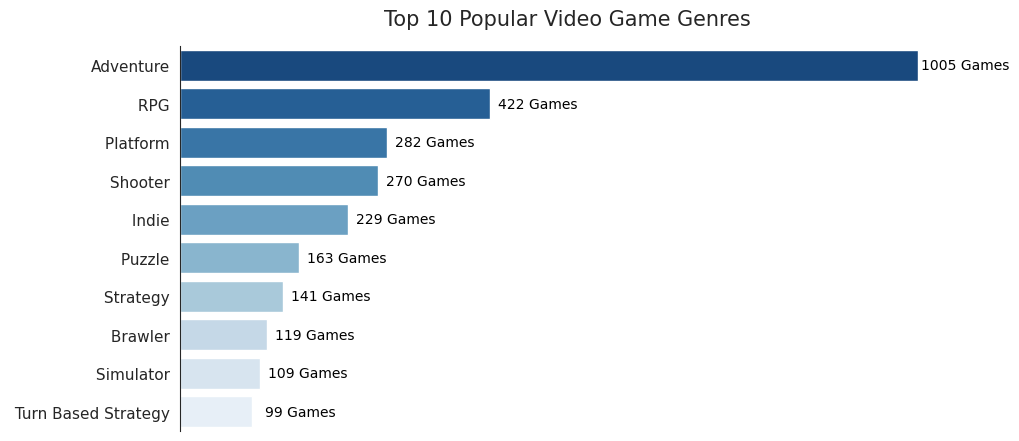

In [17]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the horizontal bar chart
sns.barplot(x=popularity[:10].values, y=popularity[:10].index, palette="Blues_r", ax=ax)

# Add labels showing the popularity of each genre
for i, v in enumerate(popularity[:10].values):
    ax.text(v + 130 / 2, i, str(f"{v} Games"), color="black", ha="center", va="center")

# Set the title and axis labels
ax.set_title("Top 10 Popular Video Game Genres", fontsize=15, pad=15)
ax.set_xlabel("")
ax.set_ylabel("")

# Remove the x-axis tick labels
ax.set_xticklabels([])

# Increase the fontsize of the y-axis tick labels
ax.tick_params(axis="y", labelsize=11)

# Remove spines from the right and top sides of the plot
sns.despine(right=True, top=True, bottom=True)

# Show the plot
plt.show()

### 1.1. What is the most popular game in each genre. 
---

#### To Calculate the most popular game in each video game we are going to ues the following approach :

1. First, we will convert the `popularity` `Series` to a `DataFrame` with a single column named `'popularity'` containing the popularity values.

2. Next, we will merges this `DataFrame` with the game data `DataFrame` (`df`) on the `'genres'` column. This adds a new `'popularity'` column to the game data containing the popularity values for each game.

3. Then, we group the merged data by the `'genres'` column using the `groupby` method. This creates a `GroupBy` object with one group for each unique value in the `'genres'` column.

4. After that, we define a function named `get_most_pop_game` that takes a `DataFrame` containing data for a group of games as input and returns the title of the most popular game in that group. The function does this by getting the row with the highest value in the `'popularity'` column and returning the value in its `'title'` column.

5. Finally, we apply this function to each group in the `GroupBy` object using the `apply` method. This returns a new `Series` object containing the title of the most popular game in each genre.

---

#### Resources :
- [Find the max value of a column and return the corresponding row values - Stackoverflow.](https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan#:~:text=Assuming%20df%20has%20a%20unique%20index%2C%20this%20gives,so%20df.loc%20may%20return%20more%20than%20one%20row.)
- [pandas.DataFrame.idxmax - Pandas Documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html)

In [18]:
# Convert the popularity to a dataframe
popularity_df = popularity.to_frame(name="popularity")

# Merge the popularity data with the game data
df_pop = df.merge(popularity_df, left_on="genres", right_index=True)

# Group the data by genre
grouped = df_pop.groupby("genres")

# Define a function to get the most popular game in each group
def get_most_pop_game(group: pd.DataFrame) -> pd.Series:
    """
    Get the most popular game in a group of games.

    This function takes a DataFrame containing data for a group of games and returns a Series containing the 
    data for the most popular game in that group.

    Parameters
    ----------
    group : pd.DataFrame
        A DataFrame containing data for a group of games. 
        Must have a column named 'popularity' containing the popularity values for each game.

    Returns
    -------
    pd.Series
        A Series containing the data for the most popular game in the input group.
    """

    # Get the row with the highest popularity value
    most_popular_game = group.loc[group["popularity"].idxmax()]
    
    # Return the title of the most popular game
    return most_popular_game["title"]

# Applying the function to the grouped dataframe and saving the result (series) into a variable
most_popular_game = grouped.apply(get_most_pop_game)

In [19]:
# Converting the series into a dataframe, reseting the index and rename the columns 
## to present the most popular game in each video game genre.
most_popular_game.to_frame().reset_index() \
                 .rename({"genres":"Game Genre", 0:"Most Popular Game"}, axis=1)

,Game Genre,Most Popular Game
0,Adventure,Metal Gear Solid 2: Sons of Liberty
1,Arcade,Chrome Dino
2,Brawler,Devil May Cry
3,Card & Board Game,Mario Party Superstars
4,Fighting,MultiVersus
5,Indie,Friday the 13th: The Game
6,MOBA,Pokémon Unite
7,Music,Friday Night Funkin'
8,Platform,Super Mario Bros. 3
9,Puzzle,Tetris


## 2. The trend of games rating over time (release date).
---

#### To analyis the change in the trend of games rating over time (release date), we are going to use the `rating` and the `release_year` columns.

- The `rating` column is going to be our indicator of how successfully a game is, represented on the x-axis. 

- The `release_year` is going to be our time-line (trend) to see the changes of video games ratings over time, represented on the y-axis.

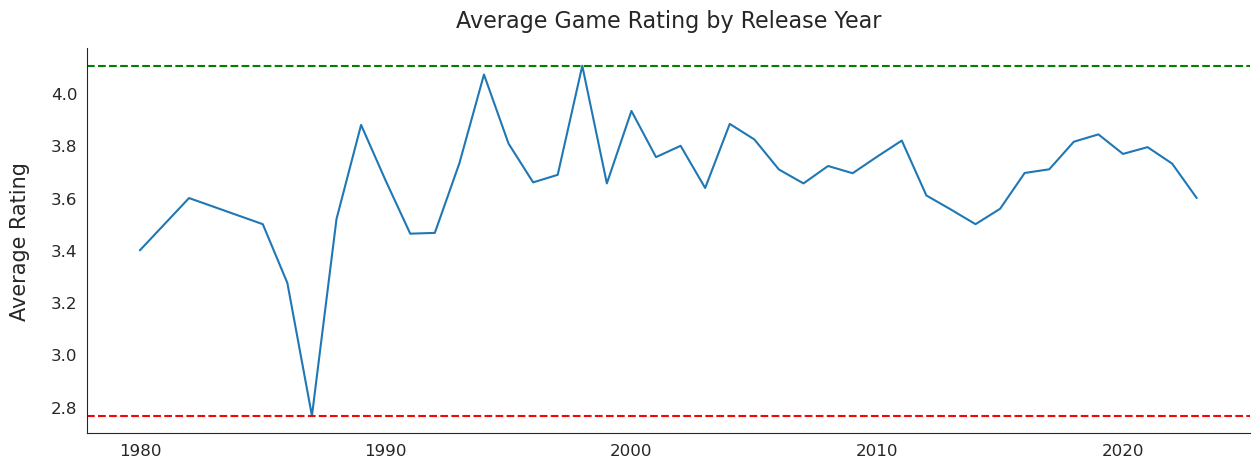

In [20]:
# Extract the release year from the release_date column
df["release_year"] = df["release_date"].dt.year

# Group the data by release year and calculate the average rating for each year
yearly_avg_rating = df.groupby("release_year")["rating"].mean().reset_index()

# Set the plot size
plt.figure(figsize=(15, 5))

# Plot the average rating by release year using Seaborn
sns.lineplot(data=yearly_avg_rating, x="release_year", y="rating")

# Despine the plot from the top and left
sns.despine(top=True, right=True)

# Add a descriptive title to the plot
plt.title("Average Game Rating by Release Year", fontsize=16, pad=15)

# Increase the padding space between the title, x-label and y-label and the plot
plt.xlabel("")
plt.ylabel("Average Rating", labelpad=15, fontsize=15)

# Increase the font-size of the x-axis and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal lines to indicate the maximum and minimum values on the y-axis
plt.axhline(y=yearly_avg_rating["rating"].max(), color="green", linestyle="--")
plt.axhline(y=yearly_avg_rating["rating"].min(), color="red", linestyle="--")
# Show the plot
plt.show()

>From 1980 through the 1990s, the average rating of video games experienced significant fluctuations, with a notable decline in the late 1980s. However, starting in the 2000s, the average rating has become more stable and consistent. 

This change over time could be due to advancements in technology and game design, evolving consumer preferences, and increased competition. These factors have led to an overall increase in the quality of games and their average ratings.

## 3. The level of engagement of players with games. 
---

#### To calculate the level of engagement of players with game we are going to thake the following approach :

1. First, we will remove the rows from the DataFrame that have a value of 0 in the `active_players` column. This is done to avoid division by zero when calculating the average number of plays per active player.

2. Next, we will calculates the average number of plays per active player for each game by dividing the `no_of_plays` column by the `active_players` column. The result is rounded to the nearest integer and stored in a new column named `avg_plays_per_player`.

3. Then we sort the data by the `avg_plays_per_player` column in descending order to show the games with the highest average number of plays per active player at the top.

4. Finally, we display the top 5 games with the highest average number of plays per active player.


In [21]:
# Remove rows with a value of 0 in the active_players column
df_engagement = df[df["active_players"] != 0]

# Calculate the average number of plays per active player for each game
df_engagement["avg_plays_per_player"] = round(df_engagement["no_of_plays"] / df_engagement["active_players"])

# Sort the data by average number of plays per active player in descending order
df_engagement = df_engagement.sort_values(by="avg_plays_per_player", ascending=False)

# Display the top 5 games with the highest average number of plays per active player
df_engagement.head()

,title,release_date,rating,genres,no_of_plays,active_players,backlogs,wishlist,release_year,avg_plays_per_player
1331,Fruit Ninja Classic,2010-04-20,3,Arcade,38000,1,32,10,2010,38000
1476,Slither.io,2016-03-25,2,"Arcade, Simulator",21000,1,21,4,2016,21000
1189,Happy Wheels,2010-06-04,3,"Adventure, Platform, Racing",51000,3,61,21,2010,17000
1454,Ms. Pac-Man,1982-02-03,4,Arcade,16000,1,45,38,1982,16000
1499,WWE SmackDown vs. Raw 2008,2007-11-09,3,"Fighting, Sport",14000,1,34,16,2007,14000


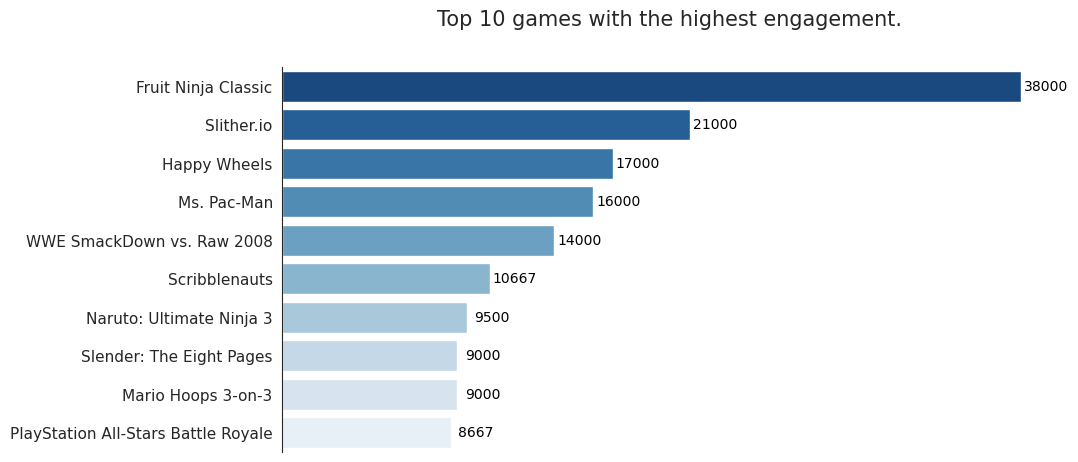

In [22]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Create a horizontal bar plot showing the average number of plays per active player for the top 10 games
sns.barplot(data=df_engagement.head(10), x="avg_plays_per_player", y="title", palette="Blues_r")

# Add labels showing the popularity of each genre
for i, v in enumerate(df_engagement["avg_plays_per_player"].head(10).values):
    ax.text(v + 2600 / 2, i, str(round(v)), color="black", ha="center", va="center")

# Set the title and axis labels
ax.set_title("Top 10 games with the highest engagement.", fontsize=15, pad=30)
ax.set_xlabel("")
ax.set_ylabel("")

# Remove the x-axis tick labels
ax.set_xticklabels([])

# Increase the fontsize of the y-axis tick labels
ax.tick_params(axis="y", labelsize=11)

# Remove spines from the right and top sides of the plot
sns.despine(right=True, top=True, bottom=True)

plt.show()

## 4. Correlation between backlogging, rating and wishlist variables. 
---

#### Let's first plot a correlation heat map of the dataset 

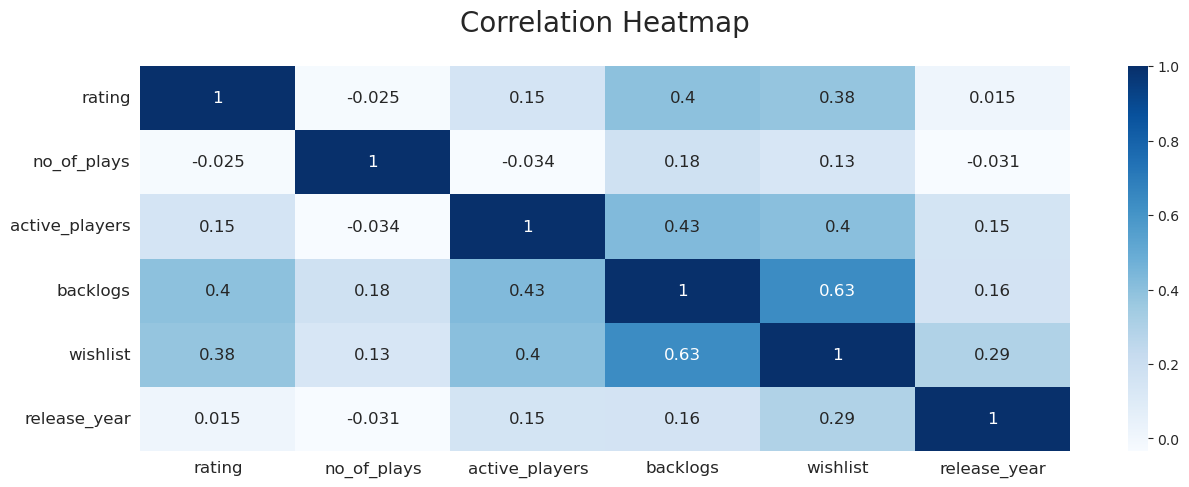

In [23]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Setting up the figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Blues", annot_kws={"size": 12}, ax=ax)

# Setting up the title
ax.set_title("Correlation Heatmap", fontsize=20, pad=25)

# Setting the x-axis and y-axis ticks sizes
ax.tick_params(axis="both", labelsize=12)

# Showing the plot
plt.show()

From observing the correlation heatamp, we can see that :

- There's a **strong correlation** between backlogs and wishlist.
- There's some correlation between rating and backlogs.

###  3.1 Correlation between backlogging and wishlist. 

In [24]:
# Grouping the data by the 'wishlist' column and calculating the mean of the 'backlogs' column for each group
wishlist_backlog = df.groupby("wishlist")["backlogs"].mean().reset_index()

# Renaming the columns for clarity
wishlist_backlog.columns = ["Wishlist", "Average Backlogs"]

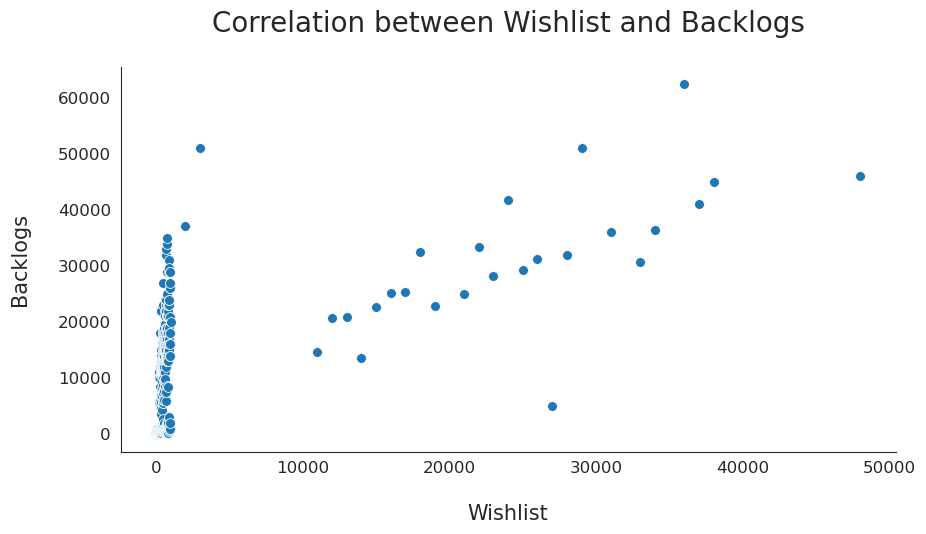

In [25]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# plotting the scatterplot
ax = sns.scatterplot(data=wishlist_backlog, x="Wishlist", y="Average Backlogs", s=50)

# Despine the plot from the right and top
sns.despine(ax=ax, top=True, right=True)

# Add a descriptive title and increase its size and add padding
ax.set_title("Correlation between Wishlist and Backlogs", fontsize=20, pad=25)

# Increase the size of the x-axis and y-axis ticks
ax.tick_params(axis="both", labelsize=12)

# Increase the size of the x-axis and y-axis labels and add paddings
ax.set_xlabel("Wishlist", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

# Show the plot
plt.show();

>The scatter plot reveals a strong correlation between the 'Wishlist' and 'Backlogs' variables. This is plausible because people who have added a game to their wishlist are likely to have access to it but may not have started playing it yet.

###  3.2 Correlation between backlogging and rating. 

In [26]:
# Grouping the data by the 'rating' column and calculating the mean of the 'backlogs' column for each group
rating_backlogs = df.groupby("rating")["backlogs"].mean().reset_index()

# Renaming the columns for clarity
rating_backlogs.columns = ["Rating", "Average Backlogs"]

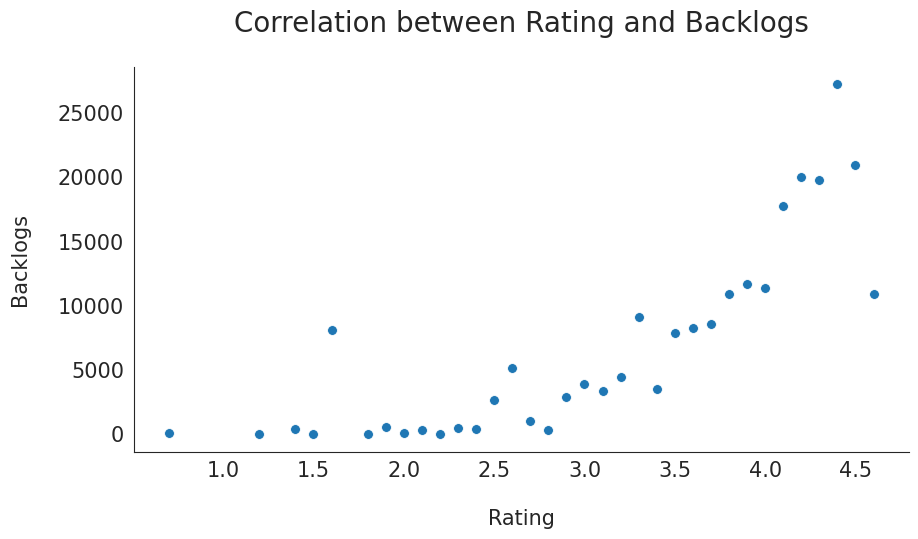

In [27]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# plotting the scatterplot
ax = sns.scatterplot(data=rating_backlogs, x="Rating", y="Average Backlogs", s=50)

# Despine the plot from the right and top
sns.despine(ax=ax, top=True, right=True)

# Add a descriptive title and increase its size and add padding
ax.set_title("Correlation between Rating and Backlogs", fontsize=20, pad=25)

# Increase the size of the x-axis and y-axis ticks
ax.tick_params(axis="both", labelsize=15)

# Increase the size of the x-axis and y-axis labels and add paddings
ax.set_xlabel("Rating", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

# Show the plot
plt.show();

>The correlation between the 'Rating' and 'Backlogs' variables appears to be positive. As the average number of backlogs increases, so does the rating. This may be due to people gaining access to games with high ratings but not starting them.

# Conclusion

My analysis of popular video games from 1980 to 2023 revealed several key insights. We found that the most popular video game genres are **Adventure**, followed by RPG, Platform, and Shooter. Within these genres, some of the most popular games include **Metal Gear Solid 2: Sons of Liberty** (Adventure), Chrome Dino (Arcade), Devil May Cry (Brawler), and Mario Party Superstars (Card & Board Game).

I also observed that the average rating of video games experienced **significant fluctuations from 1980 through the 1990s**, with a notable decline in the late 1980s. However,** starting in the 2000s, the average rating has become more stable and consistent**.

In terms of player engagement, I found that **Fruit Ninja Classic** had the highest level of engagement, followed by Slither.io, Happy Wheels, and Ms. Pac-Man.

Our analysis also revealed a strong correlation between the 'Wishlist' and 'Backlogs' variables. **This suggests that people who have added a game to their wishlist are likely to have access to it but may not have started playing it yet**. Furthermore, we found that **games with high ratings and high wishlist counts tend to have the most backlogged players**.

---

## Findings Summary
---

1. The most popular video game genres are Adventure, followed by RPG, Platform, and Shooter.

2. Some of the most popular games within these genres include Metal Gear Solid 2: Sons of Liberty (Adventure), Chrome Dino (Arcade), Devil May Cry (Brawler), and Mario Party Superstars (Card & Board Game).

3. The average rating of video games experienced significant fluctuations from 1980 through the 1990s but has become more stable and consistent since the 2000s.

4. Fruit Ninja Classic had the highest level of player engagement, followed by Slither.io, Happy Wheels, and Ms. Pac-Man.

5. There is a strong correlation between the 'Wishlist' and 'Backlogs' variables.

6. Games with high ratings and high wishlist counts tend to have the most backlogged players.

# Acknowledgement 

- [Find the max value of a column and return the corresponding row values - Stackoverflow.](https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan#:~:text=Assuming%20df%20has%20a%20unique%20index%2C%20this%20gives,so%20df.loc%20may%20return%20more%20than%20one%20row.)

- [pandas.DataFrame.idxmax - Pandas Documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html)

- [Barplot data labels inspiration - (Stackoverflow).](https://stackoverflow.com/questions/59213470/how-to-annotate-text-on-horizontal-seaborn-barplot)

- [Banner Design - Canva.](https://canva.com/)
